## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Constants

In [2]:
g = 1.25
k = 3

Helper functions

In [3]:
wM = lambda M: np.degrees(k*np.arctan(np.sqrt(M**2-1)/k)-np.arctan(np.sqrt(M**2-1)))

In [4]:
Mw = lambda win: fsolve(lambda M: wM(M)-win, 2)[0]

In [5]:
thw = lambda Ip, Im: (0.5*(Ip+Im), 0.5*(Ip-Im))

In [6]:
Iminus_center = lambda incoming_Ip: -incoming_Ip
thw_center = lambda incoming_Ip: (0, incoming_Ip)

Initial conditions

In [7]:
M0 = 1.1
Me_pset = 4
w_0, w_e = wM(M0), wM(Me_pset)
th_0, th_e = 0,0

## Part (a)

In [8]:
line_number = 6
discretization = line_number*(line_number+1)/2+1
th_w = np.empty((2,discretization))*np.nan
th, w = th_w
th[0] = th[1] = th_0
w[0] = w[1] = w_0
Im_1 = th_0-w_0
Ip_1, Ip_e = th_0+w_0, th_e+w_e
Ips = np.linspace(Ip_1, Ip_e, line_number)
Ims = -Ips

In [9]:
idx = 1
for Im_counter in range(1,line_number):
    idx +=1
    for Ip_i in Ips[Im_counter:]:
        th[idx], w[idx] = thw(Ip_i, Ims[Im_counter-1])
        idx +=1
    th[idx], w[idx] = thw_center(Ips[Im_counter])

In [10]:
table = pd.DataFrame()
table["omegas"], table["thetas"] = w, th

In [11]:
table["M"] = table["omegas"].apply(Mw)
table["mu"] = table["M"].apply(lambda M: np.degrees(np.arctan(1/np.sqrt(M**2-1))))
table["th+mu"] = table["thetas"]+table["mu"]
table["th-mu"] = table["thetas"]-table["mu"]
table["I+"] = table["thetas"]+table["omegas"]
table["I-"] = table["thetas"]-table["omegas"]
table["P/Pc"] = table["M"].apply(lambda M: (1+(g-1)/2*M**2)**(-g/(g-1)))
table["alphas"] = -np.radians(table["th-mu"])
table["betas"] = np.radians(table["th+mu"])

In [79]:
table[["M", "I+", "I-", "omegas", "thetas", "mu"]]

,M,I+,I-,omegas,thetas,mu
0,1.100000,1.434844,-1.434844,1.434844,0.000000,65.380023
1,1.100000,1.434844,-1.434844,1.434844,0.000000,65.380023
2,1.386455,17.386632,-1.434844,9.410738,7.975894,46.158937
3,1.626345,33.338419,-1.434844,17.386632,15.951787,37.942890
4,1.861247,49.290206,-1.434844,25.362525,23.927681,32.498265
5,2.101839,65.241993,-1.434844,33.338419,31.903574,28.409749
6,2.354392,81.193780,-1.434844,41.314312,39.879468,25.134084
7,1.626345,17.386632,-17.386632,17.386632,0.000000,37.942890
8,1.861247,33.338419,-17.386632,25.362525,7.975894,32.498265
9,2.101839,49.290206,-17.386632,33.338419,15.951787,28.409749


All wall point conditions are the same as the previous point (21w=21)

In [81]:
table[["th+mu", "th-mu", "P/Pc"]]

,th+mu,th-mu,P/Pc
0,65.380023,-65.380023,0.494483
1,65.380023,-65.380023,0.494483
2,54.134831,-38.183043,0.340720
3,53.894677,-21.991103,0.239730
4,56.425946,-8.570585,0.165471
5,60.313323,3.493826,0.110979
6,65.013552,14.745384,0.071920
7,37.942890,-37.942890,0.239730
8,40.474159,-24.522372,0.165471
9,44.361536,-12.457962,0.110979


## Part (b)

In [13]:
upstreams = {
    1: [0, 22],
    2: [0, 1],
    3: [0, 2],
    4: [0, 3],
    5: [0, 4],
    6: [0, 5],
    7: [2, 1],
    8: [3, 7],
    9: [4, 8],
    10: [5, 9],
    11: [6, 10],
    12: [8, 7],
    13: [9, 12],
    14: [10, 13],
    15: [11, 14],
    16: [13, 12],
    17: [14, 16],
    18: [15, 17],
    19: [17, 16],
    20: [18, 19],
    21: [20, 19],
    23: [0,6],
    24: [23, 11],
    25: [24, 15],
    26: [25, 18],
    27: [26, 20],
    28: [27, 21]
}
onthewall = [1, 7, 12, 16, 19, 21]

In [14]:
x = np.empty(29)*np.nan
y = np.empty(29)*np.nan
x[0] = 0
y[0] = 1
x[22] = 0
y[22] = 0

In [15]:
def position(xa, ya, alpha, xb, yb, beta):
    xc = (ya-yb+xa*np.tan(alpha)+xb*np.tan(beta))/(np.tan(alpha)+np.tan(beta))
    yc = (yb*np.tan(alpha)+ya*np.tan(beta)+(xa-xb)*np.tan(alpha)*np.tan(beta))/(np.tan(alpha)+np.tan(beta))
    return xc, yc

In [16]:
def positionofidx(idx):
    upstream_plus_idx, upstream_minus_idx = upstreams[idx]
    if upstream_plus_idx == 0:
        upstream_theta_idx = idx
    else:
        upstream_theta_idx = upstream_plus_idx 
        
    #print(upstream_plus_idx, upstream_minus_idx)
    xa, ya = x[upstream_plus_idx], y[upstream_plus_idx]
    xb, yb = x[upstream_minus_idx], y[upstream_minus_idx]
     
    alpha_upstream = table["alphas"].iloc[upstream_theta_idx]
    alpha_idx = table["alphas"].iloc[idx]
    alpha = np.average([alpha_upstream, alpha_idx])

    isonwall = idx in onthewall
    if isonwall:
        xc,yc = position(xa, ya, alpha, xb, yb, 0)
    else:
        beta_upstream =  table["betas"].iloc[upstream_minus_idx]
        beta_idx = table["betas"].iloc[idx]
        beta = np.average([beta_upstream, beta_idx])
        #print(xa,ya,xb,yb, np.degrees(alpha), np.degrees(beta))
        xc,yc = position(xa, ya, alpha, xb, yb, beta)
        
    return xc, yc
    

In [17]:
for idx in range(1,22):
    x[idx], y[idx] = positionofidx(idx)

### Points not on the nozzle wall:

In [86]:
pointstable = pd.DataFrame()
pointstable["x"] = x[:22]
pointstable["y"] = y[:22]
pointstable

,x,y
0,0.000000,1.000000
1,0.458258,0.000000
2,0.713928,0.438536
3,0.867298,0.649746
4,1.005602,0.848445
5,1.141891,1.069718
6,1.280003,1.336886
7,1.273959,0.000000
8,1.655280,0.311092
9,2.034409,0.657502


In [18]:
wall_thetas = {0:0}

In [19]:
def wallpositions(idx):
    upstream_plus_idx, upstream_minus_idx = upstreams[idx]
    xa, ya = x[upstream_plus_idx], y[upstream_plus_idx]
    xb, yb = x[upstream_minus_idx], y[upstream_minus_idx]
    theta_upstream = np.radians(table["thetas"].iloc[upstream_minus_idx])
    theta_previous = wall_thetas[upstream_plus_idx]
    theta_current = np.average([theta_upstream, theta_previous])
    wall_thetas[idx] = theta_upstream
    beta_upstream = table["betas"].iloc[upstream_minus_idx]
    xc, yc = position(xa, ya, -theta_current, xb, yb, beta_upstream)
    return xc, yc

In [20]:
wallidxs = range(23,29)

In [21]:
for idx in wallidxs:
    x[idx], y[idx] = wallpositions(idx)

### Points on the nozzle wall:

In [87]:
pointstable = pd.DataFrame()
pointstable["x"] = x[wallidxs]
pointstable["y"] = y[wallidxs]
pointstable

,x,y
0,1.351494,1.490294
1,4.312987,3.633390
2,9.423731,6.341174
3,19.805444,10.107447
4,41.799117,14.767841
5,90.317537,18.150323


In [22]:
allwallidxs = [0] + wallidxs

In [23]:
nozzle_height = y[-1]

In [24]:
"nozzle height is %f"%nozzle_height

'nozzle height is 18.150323'

In [25]:
xy = np.array([x,y])

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


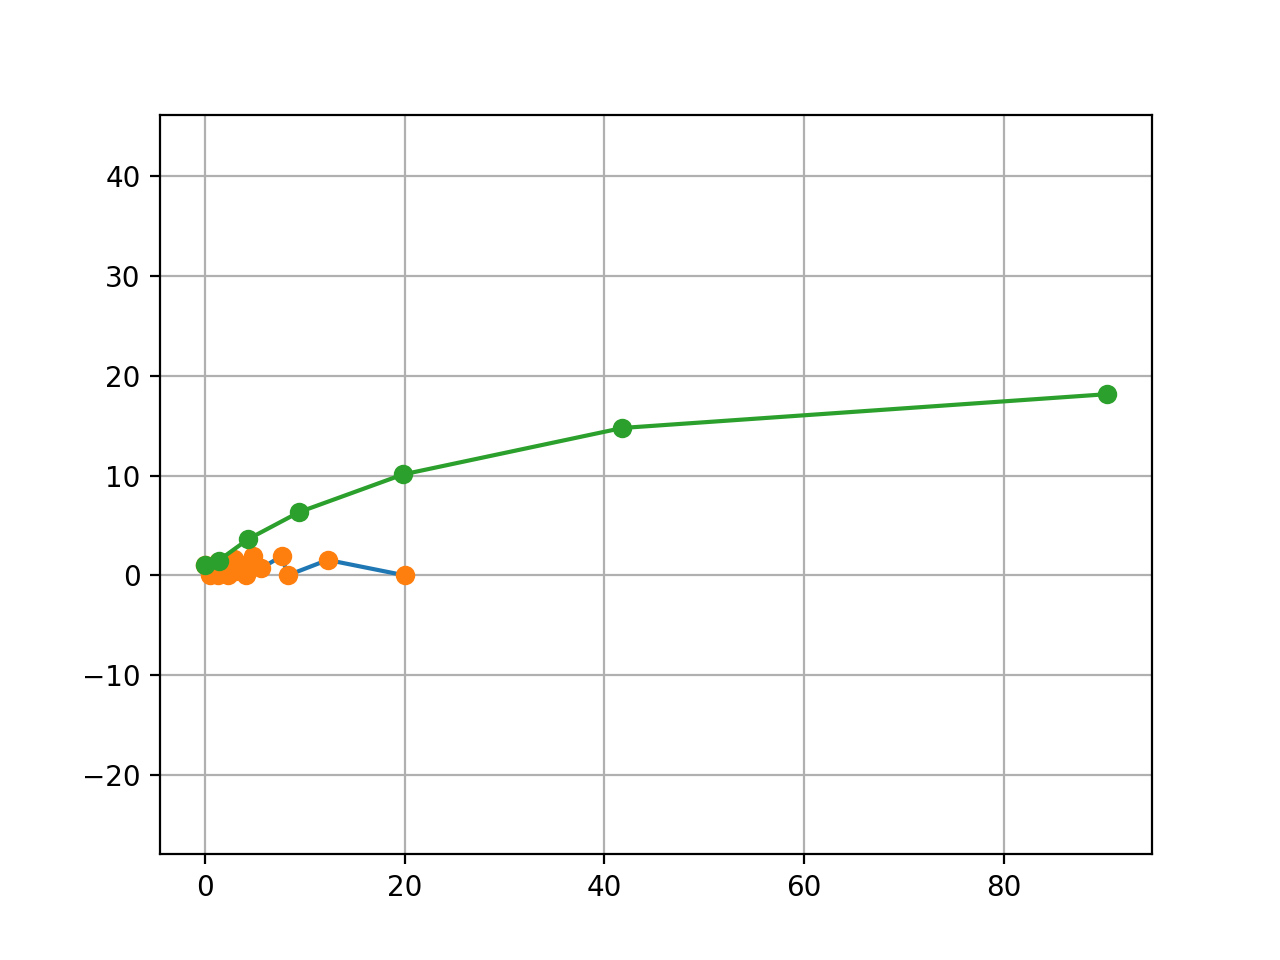

In [37]:
plt.plot(x[:22],y[:22])
plt.plot(x[:22],y[:22],'o')
plt.plot(x[[0]+wallidxs],y[[0]+wallidxs], 'o-')
plt.axis('equal')
plt.grid();

## Part (c)

In [55]:
isenT = lambda M: 1/(1+(g-1)/2*M**2)
isend = lambda M: isenT(M)**(1/(g-1))
Mratio = M0/Me_pset
Tratio = isenT(M0)/isenT(Me_pset)
uratio = Mratio*np.sqrt(Tratio)
dratio = isend(M0)/isend(Me_pset)
hanlyt = uratio*dratio

In [29]:
hanlyt

20.469863452751884

In [74]:
"Analytical nozzle height, y_21w = %f h_t, where h_t is the throat height" % hanlyt

'Analytical nozzle height, y_21w = 20.469863 h_t, where h_t is the throat height'

## Part (d)

In [48]:
CF = lambda Mz, Me: g*Mz*Me*(1+(g-1)/2*Me**2)**(-0.5)*(1+(g-1)/2*Mz**2)**(-(g+1)/(2*(g-1)))

In [53]:
cf_entire = CF(M0,Me_pset)
cf_entire

1.6847624240948047

In [76]:
"C_F for engine: %f" % cf_entire

'C_F for engine: 1.684762'

In [56]:
isenP = lambda M: isenT(M)**(g/(g-1))

In [66]:
pressure_term = isenP(1.1)-isenP(4)

In [65]:
cf_nonozzle = CF(M0,M0)+pressure_term

In [64]:
cf_nozzle = cf_entire-cf_nonozzle
cf_nozzle

0.4464879156006303

In [77]:
"C_F divergent nozzle only: %f" % cf_nozzle

'C_F divergent nozzle only: 0.446488'

## Part (e)

In [30]:
dh = np.diff(y[allwallidxs])

In [31]:
def moving_average(a, n=2) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [32]:
prewallidx = [0, 6, 11, 15, 18, 20, 21]

In [33]:
wall_pressures = table["P/Pc"].iloc[prewallidx].values
wall_pressures_segment = moving_average(wall_pressures) - wall_pressures[-1]

In [34]:
thrust_coeff = np.sum(wall_pressures_segment *dh)
thrust_coeff

0.44435779038862849

In [78]:
"Numerical thrust coefficient for nozzle only: %f" % thrust_coeff

'Numerical thrust coefficient for nozzle only: 0.444358'

## Part (f)

In [35]:
truncated_thrust_coeff = np.sum(wall_pressures_segment[:-1] *dh[:-1])
loss_in_thrust = (1-truncated_thrust_coeff/thrust_coeff)*100

In [36]:
"Loss in thrust = %f %%" % loss_in_thrust

'Loss in thrust = 1.538807 %'